In [135]:
#importing packages

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [136]:
os.chdir("../Companies UK/")

In [137]:
df = pd.read_csv("companiesList.csv")

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101123 entries, 0 to 101122
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Organisation Name  101123 non-null  object
 1   Town/City          101121 non-null  object
 2   County             36092 non-null   object
 3   Type & Rating      101123 non-null  object
 4   Route              101123 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


In [139]:
df.tail()

,Organisation Name,Town/City,County,Type & Rating,Route
101118,ZyXEL Communications UK Ltd,Wokingham,Berkshire,Worker (A rating),Global Business Mobility: Senior or Specialist...
101119,Zyzzle Limited,Surbiton,NaN,Worker (A rating),Skilled Worker
101120,ZZA CONSULTING LIMITED,LONDON,NaN,Worker (A rating),Skilled Worker
101121,ZZIY Ltd,High Wycombe,NaN,Worker (A rating),Skilled Worker
101122,Zzoomm Plc,Oxford,NaN,Worker (A rating),Skilled Worker


In [140]:
df.count()

Organisation Name    101123
Town/City            101121
County                36092
Type & Rating        101123
Route                101123
dtype: int64

In [141]:
df.rename(columns={'Town/City': 'Place'}, inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101123 entries, 0 to 101122
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Organisation Name  101123 non-null  object
 1   Place              101121 non-null  object
 2   County             36092 non-null   object
 3   Type & Rating      101123 non-null  object
 4   Route              101123 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


In [143]:
df.drop('County', axis=1, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101123 entries, 0 to 101122
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Organisation Name  101123 non-null  object
 1   Place              101121 non-null  object
 2   Type & Rating      101123 non-null  object
 3   Route              101123 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


In [145]:
df['Route'].unique()

array(['Skilled Worker', 'Creative Worker',
       'Global Business Mobility: Senior or Specialist Worker',
       'Tier 2 Ministers of Religion',
       'Global Business Mobility: UK Expansion Worker',
       'Global Business Mobility: Graduate Trainee',
       'International Sportsperson', 'Charity Worker', 'Religious Worker',
       'Government Authorised Exchange', 'International Agreement',
       'Seasonal Worker', 'Global Business Mobility: Service Supplier',
       'Scale-up', 'Global Business Mobility: Secondment Worker',
       'Intra Company Transfers (ICT)', 'Intra-company Routes'],
      dtype=object)

/var/folders/3s/ctxnws1d7z96jkwxt5d58_600000gn/T/ipykernel_36985/4083399737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Route', data=df, palette='viridis')


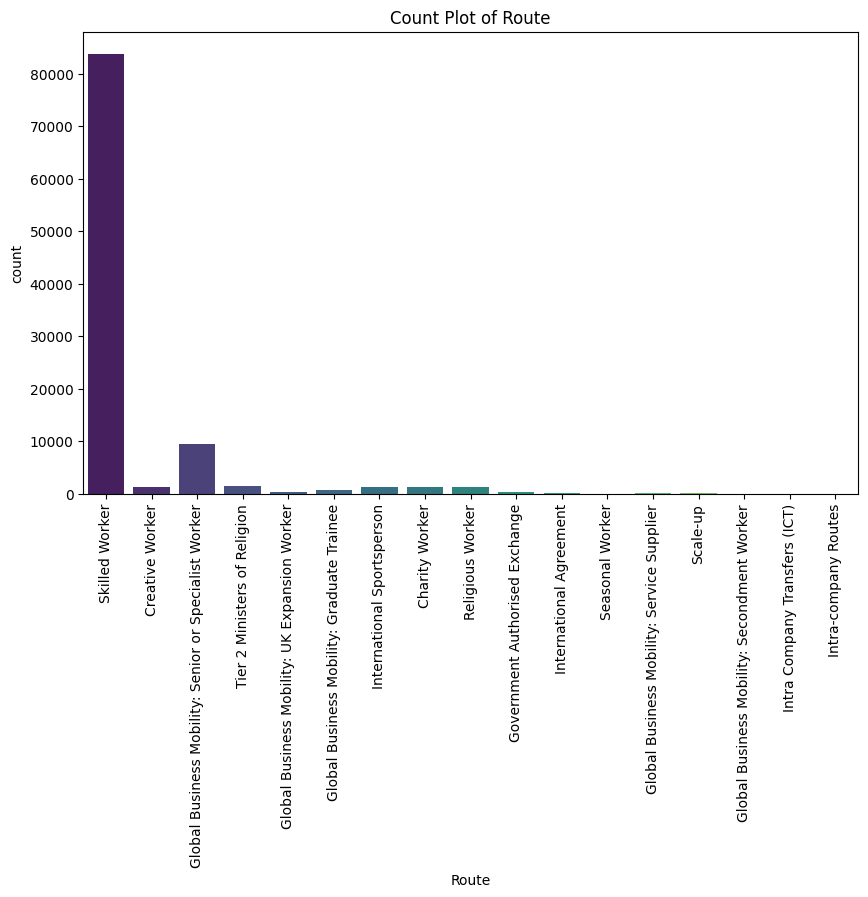

In [146]:
# Calculate the count of each value in the 'route' column
value_counts = df['Route'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Route', data=df, palette='viridis')
plt.title('Count Plot of Route')
plt.xticks(rotation=90)

plt.show()



In [147]:
df.drop('Type & Rating', axis=1, inplace=True)

In [148]:
#changing case of place and company name for uniformaity
df['Place'] = df['Place'].str.lower()
df['Organisation Name'] = df['Organisation Name'].str.lower()

In [149]:
df.head()

,Organisation Name,Place,Route
0,mcmullan shellfish,ballymena,Skilled Worker
1,rss express ltd t/a ledbury fuel service sta...,ledbury,Skilled Worker
2,(iecc care) independent excel care consortium ...,colchester,Skilled Worker
3,*aboutcare hastings ltd,east sussex,Skilled Worker
4,???£ ess ltd,manchester,Skilled Worker


In [150]:
#Total number of cities
df['Place'].nunique()

5188

In [151]:
df['Place'].value_counts()
#number of companies each city

Place
london                32045
birmingham             2224
manchester             2075
bristol                1090
leicester               963
                      ...  
high wycombe,             1
brierely hill             1
borehamwood, herts        1
much wenlock              1
mickleover                1
Name: count, Length: 5188, dtype: int64

In [152]:
#finding out number of companies in reading, berkshire
(df['Place'] == 'reading').sum()

858

In [153]:
import matplotlib.pyplot as plt

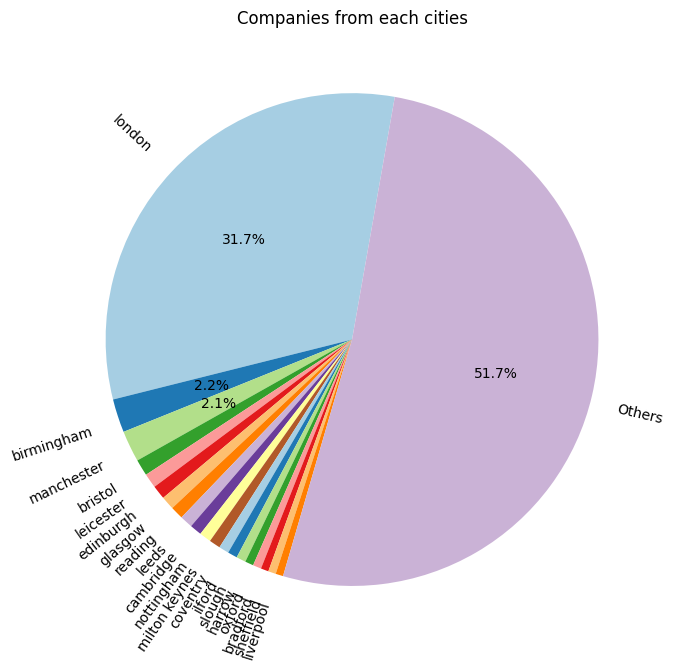

In [154]:
# Count the occurrences of each place
place_count = df['Place'].value_counts()

# Take the top 20 places
top_place = place_count.head(20)

# Sum the counts of the remaining places and create a new 'Others' category
others_count = place_count[20:].sum()
top_place['Others'] = others_count

# Function to format autopct
def my_autopct(pct):
    return '{:.1f}%'.format(pct) if pct > 2 else ''

plt.figure(figsize=(8, 8))
plt.pie(top_place, labels=top_place.index, autopct=my_autopct, startangle=80, colors=plt.cm.Paired.colors, rotatelabels=True)
plt.title('Companies from each cities')

plt.show()